In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense


X, y = make_regression(n_samples=100, n_features=5, n_informative=3, n_targets=2, random_state=2)
print(X.shape, y.shape)

(100, 5) (100, 2)


In [2]:
pd.DataFrame(np.column_stack([X, y]))

,0,1,2,3,4,5,6
0,-0.217135,-2.343603,1.173531,0.380472,1.040824,41.571131,87.176334
1,1.144855,0.829789,-0.152118,-0.164515,0.562669,9.559590,29.642561
2,-0.405286,1.186049,-1.377758,-0.794872,0.363434,-36.384164,-52.862598
3,-0.135480,1.904376,0.335908,0.376546,0.058520,20.499240,33.972128
4,-0.849996,-0.479985,-0.852342,0.665334,0.085364,32.588993,52.136007
...,...,...,...,...,...,...,...
95,-2.023364,-0.002206,0.267973,-1.531111,1.496952,-59.402781,-72.237024
96,-0.228248,0.610144,-2.069612,0.003659,0.601516,12.023863,30.672292
97,-0.956626,-1.159807,-0.183377,-1.082930,-0.158429,-65.886333,-112.381435
98,0.365054,-0.364479,0.774082,-1.985846,1.531760,-70.063295,-82.335605


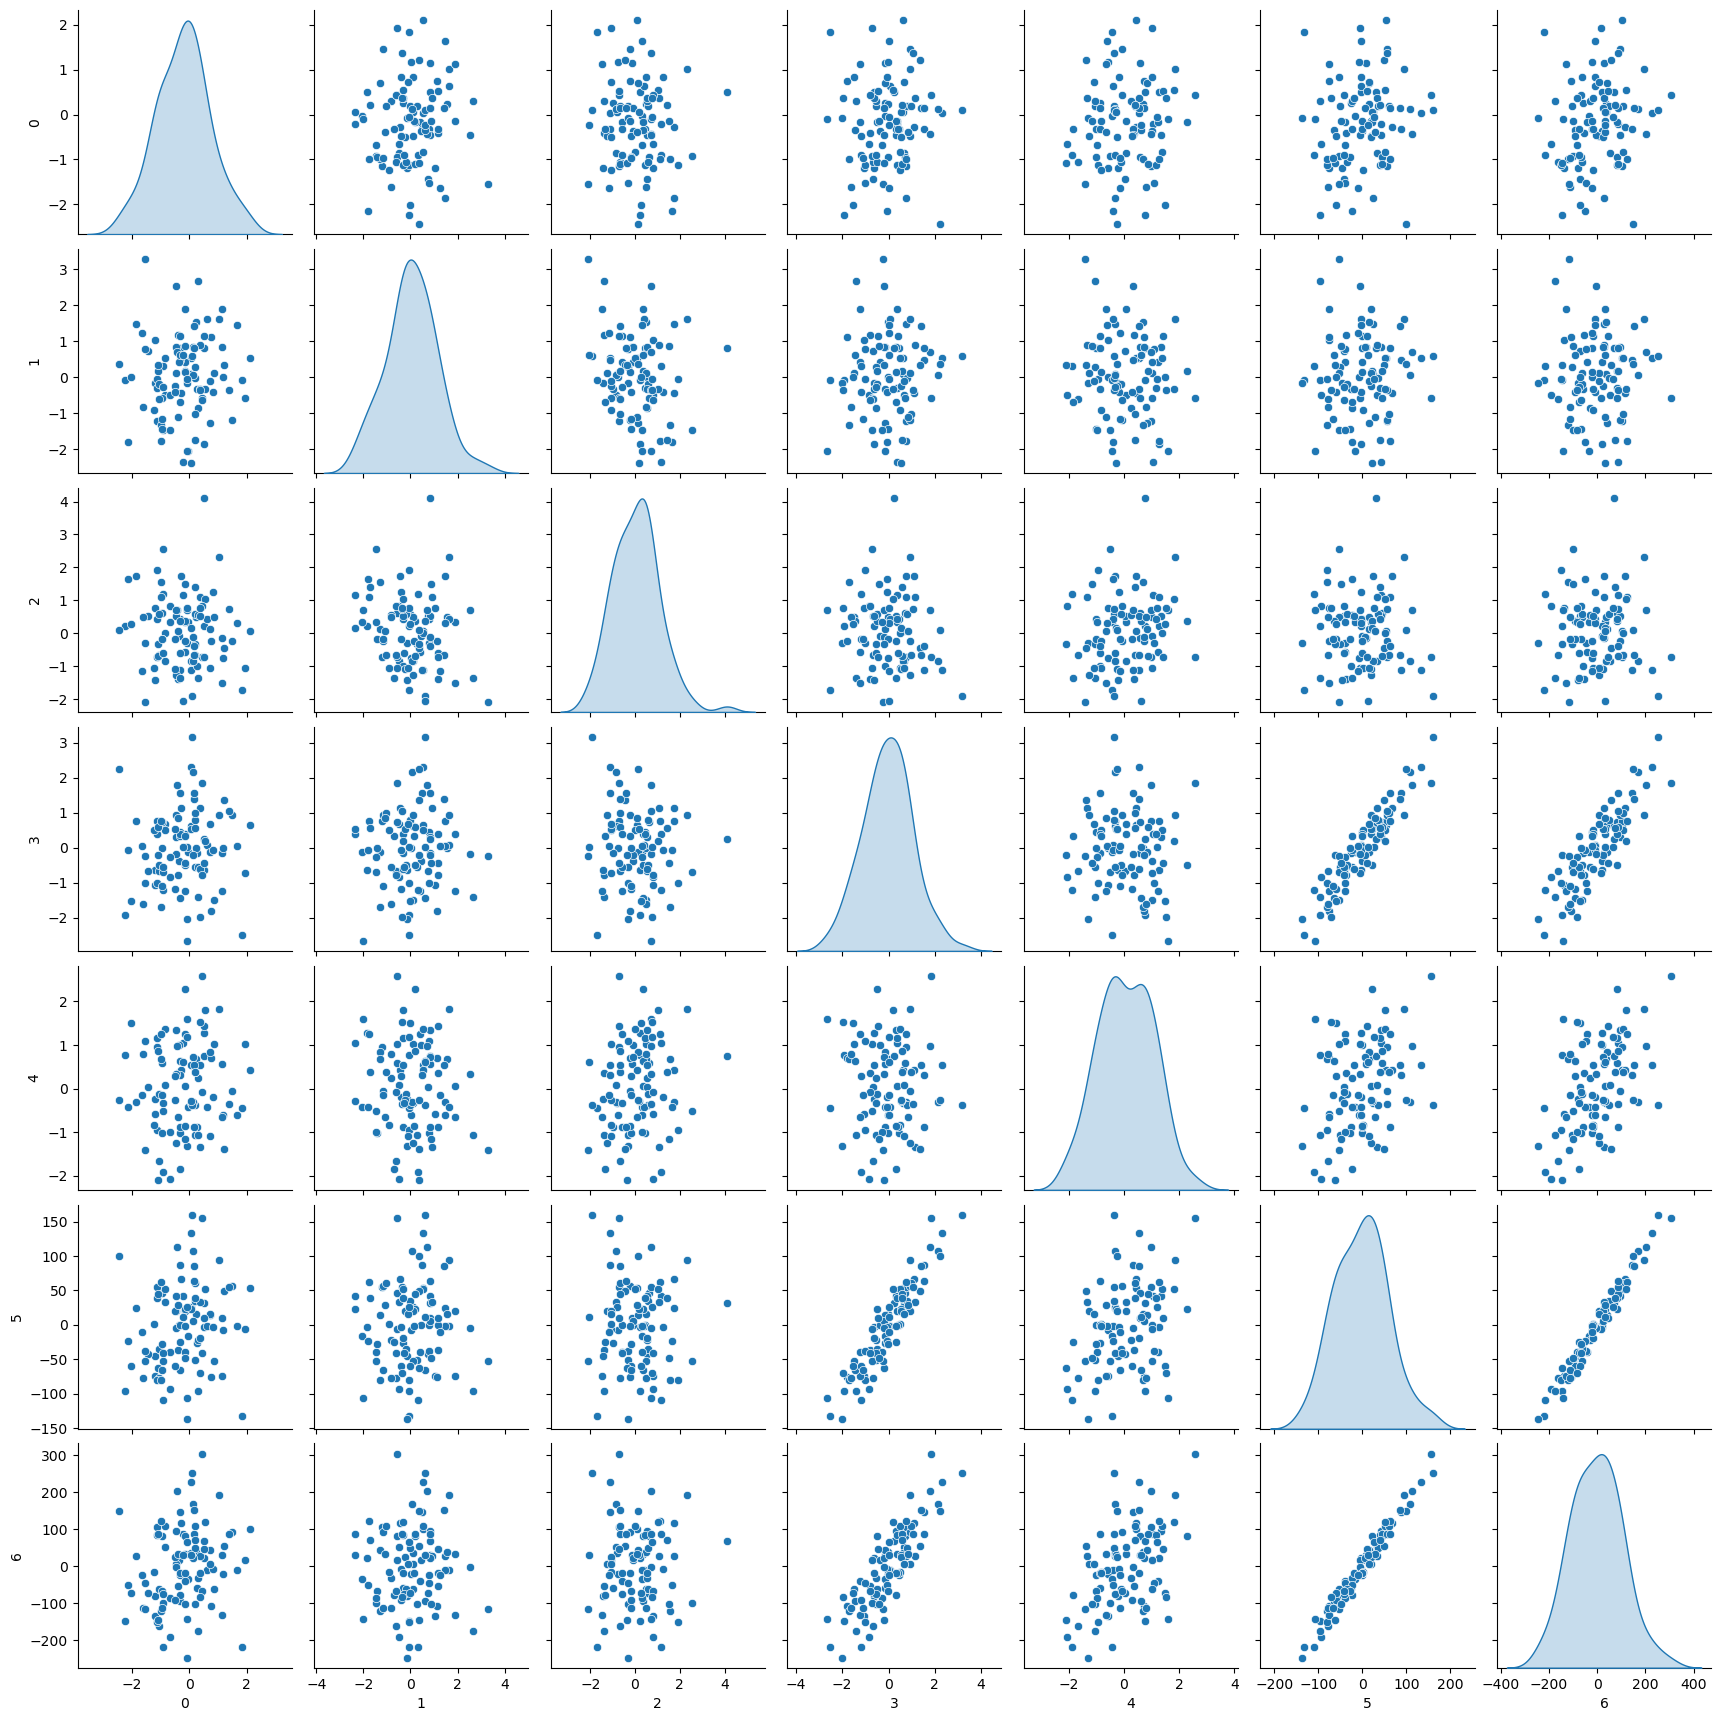

In [3]:
sns.pairplot(pd.DataFrame(np.column_stack([X, y])), diag_kind='kde')

In [4]:
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=5, n_informative=3, 
                          n_targets=2, random_state=2)
    return X, y

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model

In [5]:
X, y = get_dataset()
model = get_model(5, 2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(X, y, verbose=0, epochs=1000)

In [7]:
df = pd.DataFrame(hist.history)

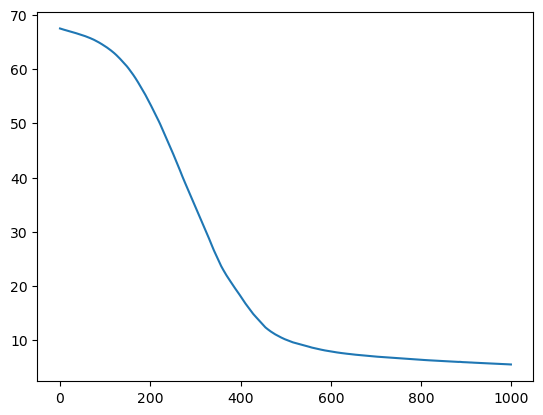

In [8]:
plt.plot(df)

In [9]:
y

array([[  41.57113109,   87.17633435],
       [   9.55959037,   29.64256067],
       [ -36.38416432,  -52.86259798],
       [  20.49924044,   33.97212768],
       [  32.58899313,   52.1360069 ],
       [ 155.62730191,  303.98224266],
       [ 133.61859208,  227.28718426],
       [  -7.70238396,  -21.00288153],
       [  54.04720828,  101.57200744],
       [ -92.68602497, -192.6335583 ],
       [ -45.20730379,  -81.05599618],
       [  66.9523134 ,  115.97985099],
       [  -3.21070462,   21.30972192],
       [  -0.95419016,  -22.5004883 ],
       [-132.76530631, -218.81102405],
       [  24.13622213,   27.84896419],
       [ -16.31203958,  -34.75980523],
       [ -25.96437582,  -58.6028173 ],
       [ -74.75072765, -135.64093735],
       [  45.55372026,   82.54750249],
       [  15.0443039 ,   38.34997532],
       [ -96.77828701, -147.68953376],
       [ -42.54065305,  -71.86952677],
       [  42.57889066,   93.95877646],
       [ -39.81875786,  -40.38071489],
       [  54.98888294,  1

In [10]:
prediction = model.predict(X)

4/4 [==============================] - 0s 1ms/step


In [11]:
prediction

array([[  45.19325   ,   83.814514  ],
       [  12.469474  ,   39.163933  ],
       [ -40.338978  ,  -55.36509   ],
       [  25.298063  ,   42.918327  ],
       [  37.620266  ,   64.55699   ],
       [ 130.65855   ,  237.80058   ],
       [ 112.8361    ,  196.17143   ],
       [  -9.11627   ,  -22.211771  ],
       [  56.542168  ,  101.82426   ],
       [ -82.91229   , -175.65327   ],
       [ -45.085407  ,  -81.04646   ],
       [  67.48292   ,  115.9359    ],
       [  -3.0479014 ,   19.254566  ],
       [   0.29397273,  -22.434992  ],
       [-112.167     , -184.39745   ],
       [  30.23745   ,   36.550713  ],
       [ -16.168581  ,  -35.427364  ],
       [ -26.789185  ,  -61.25933   ],
       [ -74.51549   , -136.34517   ],
       [  51.81081   ,   93.321236  ],
       [  18.129807  ,   46.987823  ],
       [ -91.47267   , -142.01306   ],
       [ -45.66205   ,  -77.44633   ],
       [  46.518196  ,   95.17487   ],
       [ -43.59299   ,  -40.05173   ],
       [  56.421402  ,  1

In [12]:
np.mean(np.abs((y-prediction)))

5.569817479838374

In [13]:
np.mean(np.abs((y-prediction)), axis=0)

array([4.232583  , 6.90705196])

In [14]:
np.mean(np.power(y-prediction, 2), axis=0)

array([ 47.74576349, 144.23219192])